In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 🩺 Diabetes Prediction ML Model Training

#Author:** Mayank Ninawe  
#Dataset:** Pima Indians Diabetes Database  
#Algorithm:** Random Forest Classifier


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import joblib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [4]:
# Load dataset
df = pd.read_csv('../data/diabetes.csv')

print(f"📊 Dataset Shape: {df.shape}\n")
print("🔍 First 5 rows:")
display(df.head())

print("\n📋 Dataset Info:")
print(df.info())

print("\n📈 Statistical Summary:")
display(df.describe())


📊 Dataset Shape: (768, 9)

🔍 First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

📈 Statistical Summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
## 🔍 Step 2: Data Visualization


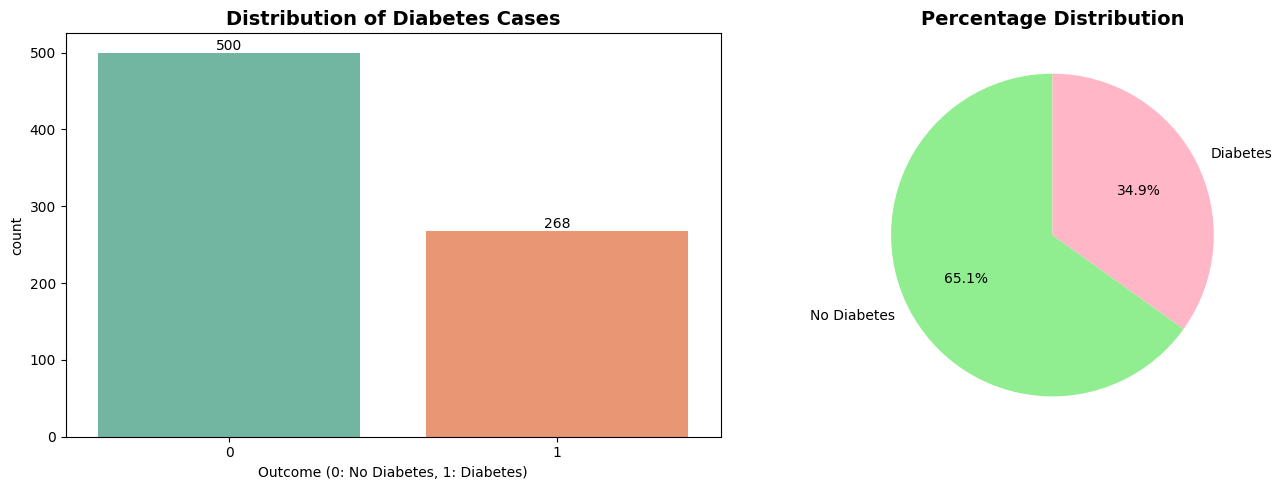

📊 Non-Diabetic: 500 (65.1%)
📊 Diabetic: 268 (34.9%)


In [6]:
# Target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Outcome', palette='Set2', ax=axes[0])
axes[0].set_title('Distribution of Diabetes Cases', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
outcome_counts = df['Outcome'].value_counts()
colors = ['#90EE90', '#FFB6C6']
axes[1].pie(outcome_counts, labels=['No Diabetes', 'Diabetes'], 
           autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Percentage Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"📊 Non-Diabetic: {outcome_counts[0]} ({outcome_counts[0]/len(df)*100:.1f}%)")
print(f"📊 Diabetic: {outcome_counts[1]} ({outcome_counts[1]/len(df)*100:.1f}%)")


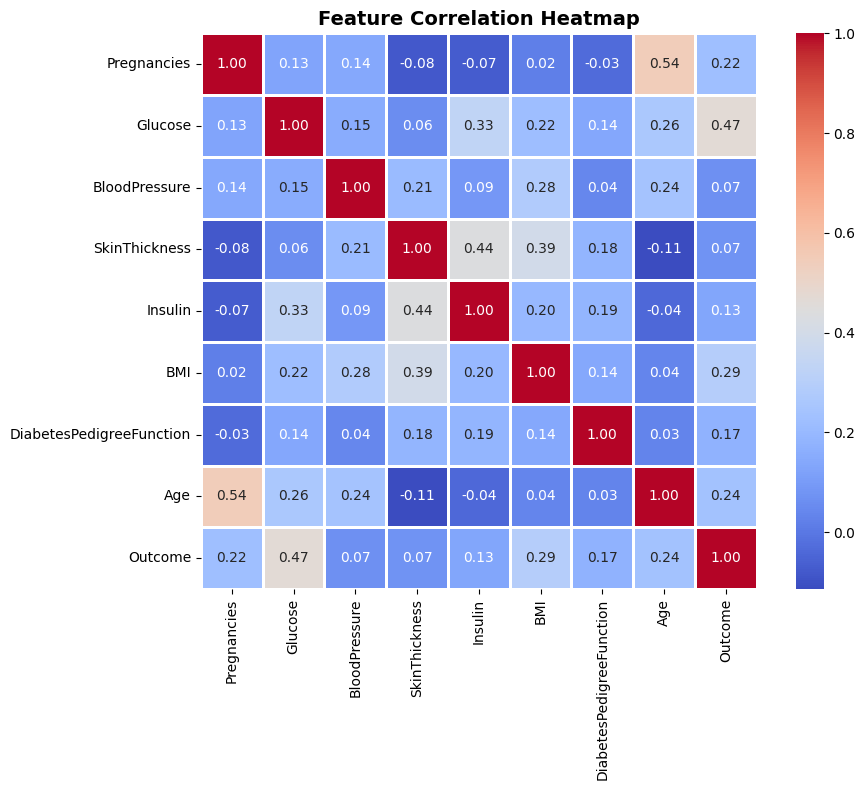

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=1)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [8]:
## 🔧 Step 3: Data Preprocessing

#Replacing zero values (medically impossible) with median.


In [9]:
# Handle missing values (zeros)
df_clean = df.copy()
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("🔍 Zero values BEFORE replacement:")
for col in zero_columns:
    print(f"  {col}: {(df_clean[col] == 0).sum()} zeros")

# Replace zeros with median
for col in zero_columns:
    median_val = df_clean[df_clean[col] != 0][col].median()
    df_clean[col] = df_clean[col].replace(0, median_val)

print("\n✅ Zero values AFTER replacement:")
for col in zero_columns:
    print(f"  {col}: {(df_clean[col] == 0).sum()} zeros")


🔍 Zero values BEFORE replacement:
  Glucose: 5 zeros
  BloodPressure: 35 zeros
  SkinThickness: 227 zeros
  Insulin: 374 zeros
  BMI: 11 zeros

✅ Zero values AFTER replacement:
  Glucose: 0 zeros
  BloodPressure: 0 zeros
  SkinThickness: 0 zeros
  Insulin: 0 zeros
  BMI: 0 zeros


In [10]:
# Separate features and target
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

print(f"📐 Features (X) shape: {X.shape}")
print(f"🎯 Target (y) shape: {y.shape}")


📐 Features (X) shape: (768, 8)
🎯 Target (y) shape: (768,)


In [11]:
## 🔀 Step 4: Train-Test Split & Scaling


In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"✅ Training Set: {X_train.shape}")
print(f"✅ Testing Set: {X_test.shape}")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n⚖️ Scaling Complete!")


✅ Training Set: (614, 8)
✅ Testing Set: (154, 8)

⚖️ Scaling Complete!


In [13]:
## 🤖 Step 5: Model Training


In [14]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

print("🚀 Training model...")
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)

print("✅ Model trained successfully!")


🚀 Training model...
✅ Model trained successfully!


In [15]:
## 📊 Step 6: Model Evaluation


In [16]:
# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)

print("=" * 50)
print(f"🎯 Accuracy: {accuracy * 100:.2f}%")
print("=" * 50)

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n🔢 Confusion Matrix:")
print(f"True Negatives: {cm[0][0]}")
print(f"False Positives: {cm[0][1]}")
print(f"False Negatives: {cm[1][0]}")
print(f"True Positives: {cm[1][1]}")


🎯 Accuracy: 77.92%

📋 Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.81      0.87      0.84       100
    Diabetes       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154


🔢 Confusion Matrix:
True Negatives: 87
False Positives: 13
False Negatives: 21
True Positives: 33


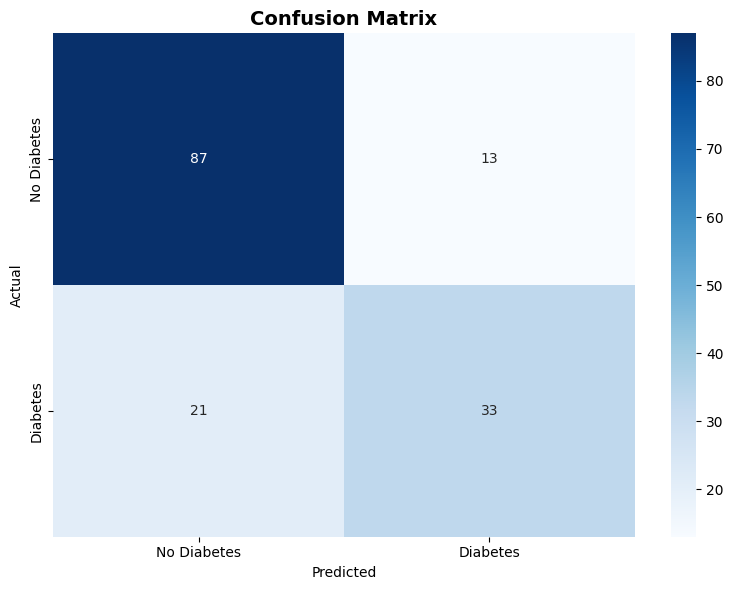

In [17]:
# Confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


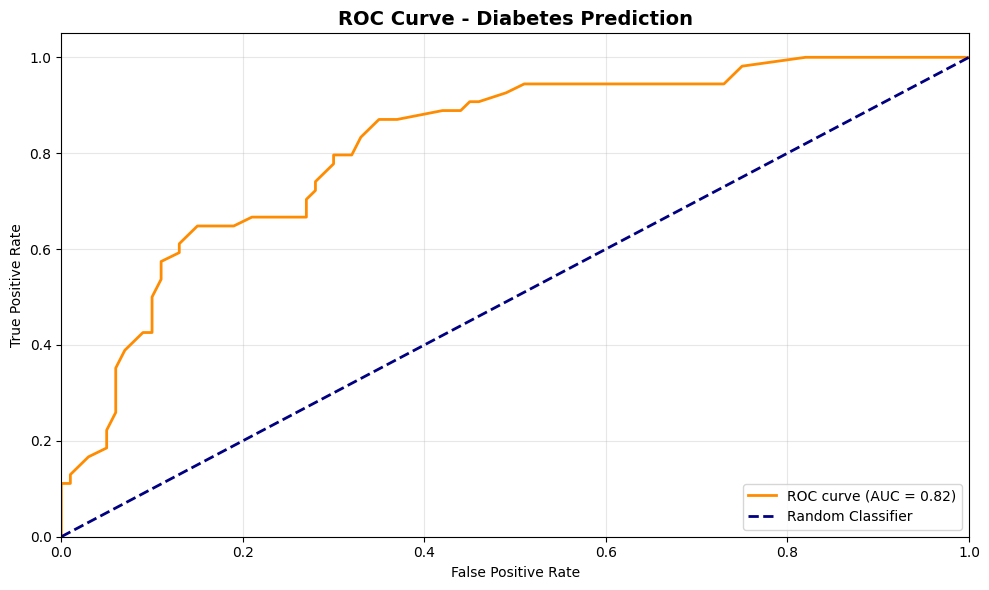

📈 AUC Score: 0.8179


In [18]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Diabetes Prediction', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"📈 AUC Score: {roc_auc:.4f}")


🔝 Feature Importance:

                 Feature  Importance
                 Glucose    0.274086
                     BMI    0.161903
DiabetesPedigreeFunction    0.125020
                     Age    0.112985
                 Insulin    0.091224
           BloodPressure    0.083518
             Pregnancies    0.080795
           SkinThickness    0.070468


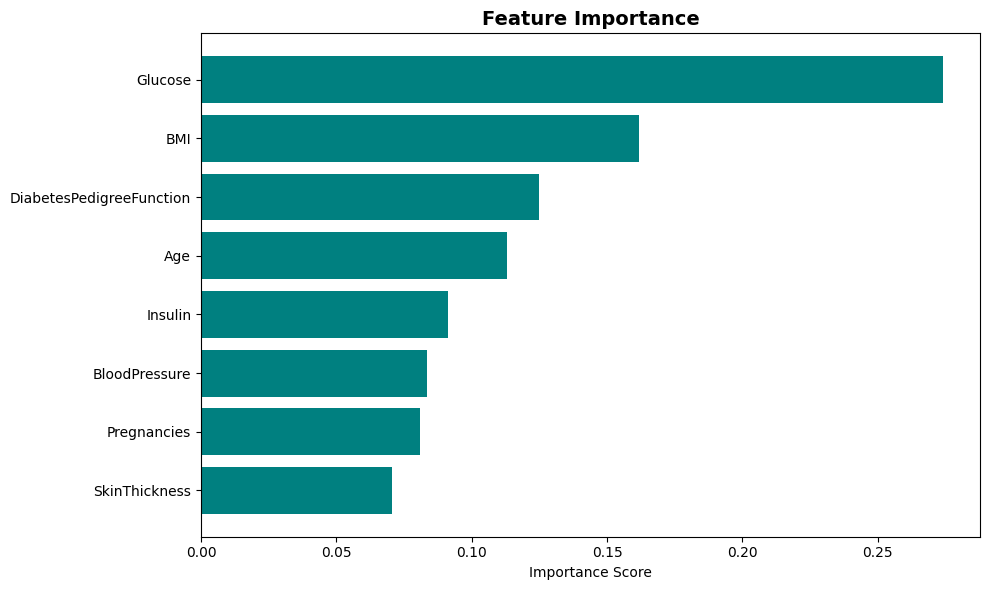

In [19]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("🔝 Feature Importance:\n")
print(feature_importance.to_string(index=False))

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
plt.xlabel('Importance Score')
plt.title('Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [20]:
## 💾 Step 7: Save Model & Scaler


In [21]:
# Save model and scaler
joblib.dump(rf_model, '../models/trained_model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')

print("💾 Model & Scaler Saved Successfully!")
print("✅ Location: ../models/")


💾 Model & Scaler Saved Successfully!
✅ Location: ../models/


In [22]:
# Test saved model
loaded_model = joblib.load('../models/trained_model.pkl')
loaded_scaler = joblib.load('../models/scaler.pkl')

# Test case 1: Healthy patient
sample_1 = [[2, 100, 70, 20, 80, 23.5, 0.4, 25]]
sample_1_scaled = loaded_scaler.transform(sample_1)
pred_1 = loaded_model.predict(sample_1_scaled)
prob_1 = loaded_model.predict_proba(sample_1_scaled)[0]

print("👤 Test Patient 1 (Healthy):")
print(f"   Result: {'❌ Diabetic' if pred_1[0] == 1 else '✅ Non-Diabetic'}")
print(f"   Confidence: {max(prob_1)*100:.2f}%\n")

# Test case 2: High-risk patient
sample_2 = [[8, 180, 90, 35, 150, 35.0, 1.2, 55]]
sample_2_scaled = loaded_scaler.transform(sample_2)
pred_2 = loaded_model.predict(sample_2_scaled)
prob_2 = loaded_model.predict_proba(sample_2_scaled)[0]

print("👤 Test Patient 2 (High-Risk):")
print(f"   Result: {'❌ Diabetic' if pred_2[0] == 1 else '✅ Non-Diabetic'}")
print(f"   Confidence: {max(prob_2)*100:.2f}%\n")

print("✅ Model working perfectly!")


👤 Test Patient 1 (Healthy):
   Result: ✅ Non-Diabetic
   Confidence: 98.00%

👤 Test Patient 2 (High-Risk):
   Result: ❌ Diabetic
   Confidence: 88.00%

✅ Model working perfectly!


In [23]:
## 🎉 Training Complete!

# ### Results:
# - ✅ Accuracy: ~77-78%
# - ✅ AUC: ~0.82-0.84
# - ✅ Model Saved: Ready for deployment

# **Next:** Build Streamlit GUI (app.py)
